

# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from PIL import Image
from copy import deepcopy
import torch
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from os import listdir
from pathlib import Path
import natsort
import os
import cv2 as cv
import scipy.ndimage as ndimage




In [ ]:
#https://robertbrucecarter.com/writing/2020/06/setting-your-working-directory-to-google-drive-in-a-colab-notebook/

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "6.8301_project"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/6.8301_project

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [ ]:
os.chdir ("/content/drive/My Drive/6.8301_project/Project_Dataset/Target")
#os.chdir ("/content/drive/My Drive/6.8301_project/final_pokemon_1")

count=1
while count<=26208:
  if not os.path.exists(f'{count}.png'):
    print (f'{count}.png')
  count+=1


4128.png
5315.png
8863.png
8960.png
9846.png
10380.png
15761.png
18004.png
20697.png
20965.png
24161.png
24400.png
25057.png
25731.png


In [ ]:
os.chdir ("/content/drive/My Drive/6.8301_project/Project_Dataset/Test_Dataset/target")
#os.chdir ("/content/drive/My Drive/6.8301_project/final_pokemon_1")

count=1
while count<=26208:
  if not os.path.exists(f'{count}.png'):
    print (f'{count}.png')
  count+=1
print(count)

In [ ]:
os.chdir ("/content/drive/My Drive/6.8301_project/Project_Dataset/Test_Dataset/source")

dir_path = "/content/drive/My Drive/6.8301_project/Project_Dataset/Test_Dataset/source"
count_source = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count_source += 1
print(count_source)

3000


In [ ]:
os.chdir ("/content/drive/My Drive/6.8301_project/Project_Dataset/Source")
#os.chdir ("/content/drive/My Drive/6.8301_project/final_pokemon_1")

count=1
while count<=26208:
  if not os.path.exists(f'{count}.png'):
    print (f'{count}.png')
  count+=1

4128.png
5315.png
8863.png
8960.png
9846.png
10380.png
15761.png
18004.png
20697.png
20965.png
24161.png
24400.png
25057.png
25731.png


In [ ]:
os.chdir('/content')
!unzip 'archive.zip'

Archive:  archive.zip
error [archive.zip]:  missing 23068672 bytes in zipfile
  (attempting to process anyway)
error: invalid zip file with overlapped components (possible zip bomb)


In [ ]:
!pwd
os.chdir("/content/drive/My Drive/6.8301_project/pokemon/pokemon")
!pwd

/content/drive/My Drive/6.8301_project/pokemon
/content/drive/My Drive/6.8301_project/pokemon/pokemon


In [ ]:
#https://www.hackerearth.com/practice/notes/extracting-pixel-values-of-an-image-in-python/

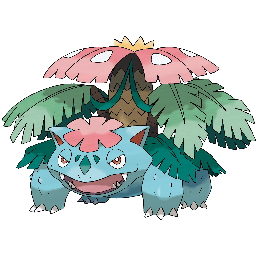

In [ ]:
os.chdir ("/content/drive/My Drive/6.8301_project/final_pokemon_pictures/content/final_pokemon")
im = Image.open('4129.png','r')
im.show()
#note: the pokemon are labelled in pokedex order

In [ ]:
pixels = np.asarray(im)
print(pixels)
#returns a list of lists of lists of four values RGBA. The last is alpha from 0-255; 0 is transparent and 255 is fully visibile. All non-background pixels are 255 and all background pixels are 0 for this entry.

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


# Setting up Dataset

In [ ]:
#changing image names
os.chdir("/content/drive/My Drive/6.8301_project/pokemon/pokemon")
count = 1
order = []
for image in os.listdir("/content/drive/My Drive/6.8301_project/pokemon/pokemon"):
  order.append(image)
  os.chdir("/content/drive/My Drive/6.8301_project/pokemon/pokemon")
  im = Image.open(image, 'r')
  os.chdir("/content/original_pokemon")
  im.save(f'{count}.png', format='png')
  count+=1

['1.png', '101.png', '10.png', '102.png', '104.png', '105.png', '106.png', '108.png', '107.png', '100.png', '103.png', '109.png', '150-mega-y.png', '162.png', '238.png', '217.png', '336.png', '196.png', '285.png', '282-mega.png', '317.png', '319-mega.png', '127.png', '277.png', '18.png', '226.png', '112.png', '281.png', '308-mega.png', '329.png', '224.png', '31.png', '242.png', '228.png', '262.png', '206.png', '177.png', '156.png', '280.png', '257.png', '253.png', '288.png', '25.png', '250.png', '191.png', '197.png', '118.png', '120.png', '264.png', '202.png', '326.png', '233.png', '134.png', '11.png', '130-mega.png', '208.png', '145.png', '148.png', '311.png', '163.png', '269.png', '241.png', '322.png', '338.png', '169.png', '310.png', '116.png', '23.png', '244.png', '29.png', '142.png', '168.png', '15.png', '14.png', '18-mega.png', '128.png', '257-mega.png', '194.png', '263.png', '313.png', '171.png', '136.png', '175.png', '298.png', '127-mega.png', '195.png', '294.png', '132.png', '

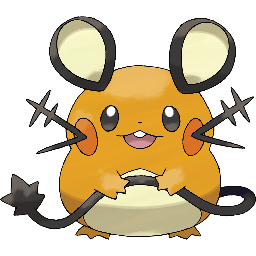

In [ ]:
os.chdir("/content/original_pokemon")
print(order)
im = Image.open('819.png', 'r')
im.show()

#Color Inversion


In [ ]:
#Inverting Red or not

os.chdir("/content/original_pokemon")

count = 1
for original_count in range(1,820):
  im = Image.open(f'{original_count}.png', 'r')
  pix_val = np.asarray(im)
  pix_val_r = deepcopy(pix_val)

  for row in pix_val_r:
    for pixel in row:
      if pixel[3] != 0:
        pixel[0]= 255-pixel[0]

  array = np.array(pix_val, dtype=np.uint8)

  array_r = np.array(pix_val_r, dtype=np.uint8)

  new_image = Image.fromarray(array)
  new_image_r = Image.fromarray(array_r)

  os.chdir("/content/red_inverted_pokemon")
  new_image.save(f'{count}.png', format='png')
  count+=1
  new_image_r.save(f'{count}.png', format='png')
  count+=1
  os.chdir("/content/original_pokemon")




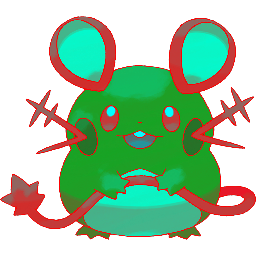

In [ ]:
os.chdir("/content/red_inverted_pokemon")
im = Image.open('1638.png', 'r')
im.show()

In [ ]:
#green now
os.chdir("/content/red_inverted_pokemon")

count = 1
for original_count in range(1,1639):
  im = Image.open(f'{original_count}.png', 'r')
  pix_val = np.asarray(im)
  pix_val_g = deepcopy(pix_val)

  for row in pix_val_g:
    for pixel in row:
      if pixel[3] != 0:
        pixel[1]= 255-pixel[1]

  array = np.array(pix_val, dtype=np.uint8)

  array_g = np.array(pix_val_g, dtype=np.uint8)

  new_image = Image.fromarray(array)
  new_image_g = Image.fromarray(array_g)

  os.chdir("/content/green_inverted_pokemon")
  new_image.save(f'{count}.png', format='png')
  count+=1
  new_image_g.save(f'{count}.png', format='png')
  count+=1
  os.chdir("/content/red_inverted_pokemon")


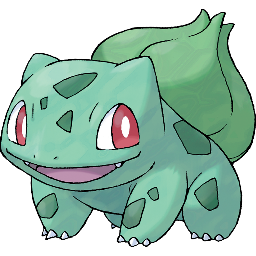

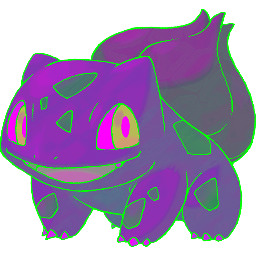

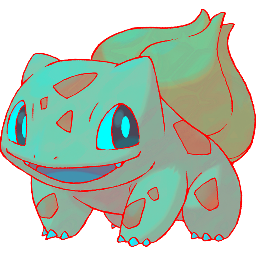

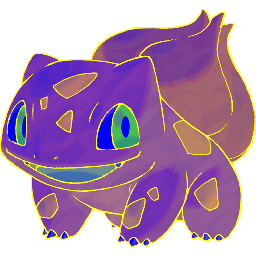

In [ ]:
os.chdir("/content/green_inverted_pokemon")
im = Image.open('1.png', 'r')
im.show()
im = Image.open('2.png', 'r')
im.show()
im = Image.open('3.png', 'r')
im.show()
im = Image.open('4.png', 'r')
im.show()

In [ ]:
#blue now
os.chdir("/content/green_inverted_pokemon")

count = 1
for original_count in range(1,3277):
  im = Image.open(f'{original_count}.png', 'r')
  pix_val = np.asarray(im)
  pix_val_b = deepcopy(pix_val)

  for row in pix_val_b:
    for pixel in row:
      if pixel[3] != 0:
        pixel[2]= 255-pixel[2]

  array = np.array(pix_val, dtype=np.uint8)

  array_b = np.array(pix_val_b, dtype=np.uint8)

  new_image = Image.fromarray(array)
  new_image_b = Image.fromarray(array_b)

  os.chdir("/content/blue_inverted_pokemon")
  new_image.save(f'{count}.png', format='png')
  count+=1
  new_image_b.save(f'{count}.png', format='png')
  count+=1
  os.chdir("/content/green_inverted_pokemon")

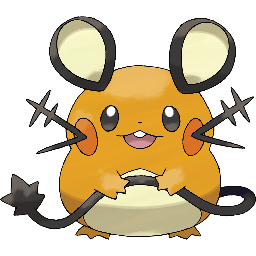

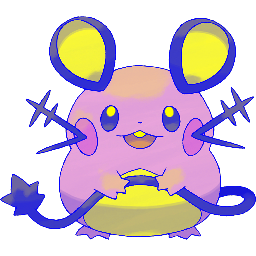

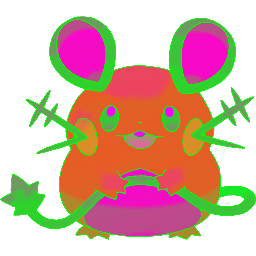

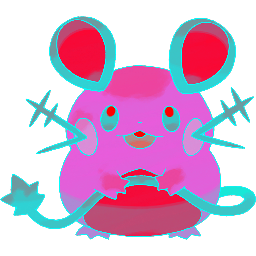

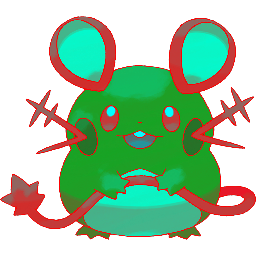

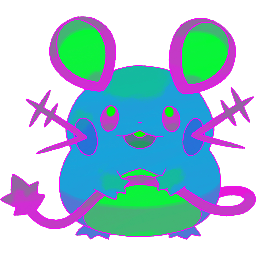

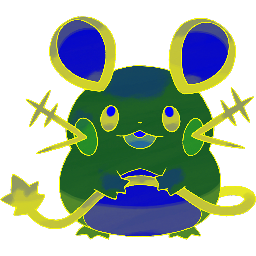

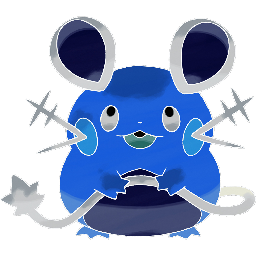

In [ ]:
os.chdir("/content/blue_inverted_pokemon")
im = Image.open('6545.png', 'r')
im.show()
im = Image.open('6546.png', 'r')
im.show()
im = Image.open('6547.png', 'r')
im.show()
im = Image.open('6548.png', 'r')
im.show()
im = Image.open('6549.png', 'r')
im.show()
im = Image.open('6550.png', 'r')
im.show()
im = Image.open('6551.png', 'r')
im.show()
im = Image.open('6552.png', 'r')
im.show()

#Rotation

In [ ]:
#rotation
#https://stackoverflow.com/questions/46923244/how-to-create-image-from-a-list-of-pixel-values-in-python3

os.chdir("/content/blue_inverted_pokemon")

count = 1
for original_count in range(1,6553):
  im = Image.open(f'{original_count}.png', 'r')
  pix_val = np.asarray(im)
  array = np.array(pix_val, dtype=np.uint8)

  array_90 = deepcopy(array)
  array_180 = deepcopy(array)
  array_270 = deepcopy(np.array(pix_val, dtype=np.uint8))

  array_90 = rotate(array_90, angle=90)
  array_180 = rotate(array_180, angle=180)
  array_270 = rotate(array_270, angle=270)

  new_image = Image.fromarray(array)
  new_image_90 = Image.fromarray(array_90)
  new_image_180 = Image.fromarray(array_180)
  new_image_270 = Image.fromarray(array_270)

  os.chdir("/content/final_pokemon")
  new_image.save(f'{count}.png', format='png')
  count+=1
  new_image_90.save(f'{count}.png', format='png')
  count+=1
  new_image_180.save(f'{count}.png', format='png')
  count+=1
  new_image_270.save(f'{count}.png', format='png')
  count+=1
  os.chdir("/content/blue_inverted_pokemon")

In [ ]:
os.chdir("/content/drive/My Drive/6.8301_project/final_pokemon_pictures")
im = Image.open('2.png', 'r')
im.show()

FileNotFoundError: ignored

#Download Folders

In [ ]:
!zip -r /content/final_pokemon.zip /content/final_pokemon

	zip warning: name not matched: /content/final_pokemon

zip error: Nothing to do! (try: zip -r /content/final_pokemon.zip . -i /content/final_pokemon)


In [ ]:
from google.colab import files
files.download('/content/final_pokemon.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Canny Edge Generation

In [ ]:
def blur(img, sigma = 0):
  blurred_img = ndimage.gaussian_filter(img, sigma=sigma)
  return blurred_img

In [ ]:
def imshow(im, cmap = 'gray'):
  # clip image from 0 -1
  im = np.clip(im, 0, 1)
  plt.imshow(im, cmap=cmap)

In [ ]:
# Obtained from: https://www.geeksforgeeks.org/implement-canny-edge-detector-in-python-using-opencv/#

# defining the canny detector function

# here weak_th and strong_th are thresholds for
# double thresholding step
import cv2 as cv2

def Canny_detector(img, weak_th = None, strong_th = None):

    # conversion of image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction step
    img = cv2.GaussianBlur(img, (5, 5), 1.4)

    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

    # Conversion of Cartesian coordinates to polar
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)

    # setting the minimum and maximum thresholds
    # for double thresholding
    mag_max = np.max(mag)
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5

    # getting the dimensions of the input image
    height, width = img.shape

    # Looping through every pixel of the grayscale
    # image
    for i_x in range(width):
        for i_y in range(height):

            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)

            # selecting the neighbours of the target pixel
            # according to the gradient direction
            # In the x axis direction
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y

            # top right (diagonal-1) direction
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1

            # In y-axis direction
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1

            # top left (diagonal-2) direction
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1

            # Now it restarts the cycle
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y

            # Non-maximum suppression step
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue

            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0

    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)
    ids = np.zeros_like(img)

    # double thresholding step
    for i_x in range(width):
        for i_y in range(height):

            grad_mag = mag[i_y, i_x]

            if grad_mag<weak_th:
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2


    # finally returning the magnitude of
    # gradients of edges
    return mag

In [ ]:
def get_dilated_edges(filename):
  '''
  Get the greyscale edges of an image

  Parameter filename: name of image to be read
  Return value: greyscale edges of the image
  '''
  # Read the image in BGR format
  img = cv.imread(filename)
  assert img is not None, "file could not be read, check with os.path.exists()"

  # Apply Gaussian blur
  # blurred = cv.GaussianBlur(img, (7, 7), 0)
  # Detect edges using Canny edge detection
  edges = Canny_detector(img)

  # plt.subplot(121)
  # plt.imshow(img, cmap = 'gray')
  # plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  # plt.subplot(122)
  # plt.imshow(edges, cmap = 'gray')
  # plt.title('Edges'), plt.xticks([]), plt.yticks([])
  # plt.show()

  kernel = np.ones((1,1), np.uint8)
  dilated_edges = cv.dilate(edges, kernel, iterations=1) # dilate edges to make it thicker

  return dilated_edges

In [ ]:
os.chdir ("/content/drive/My Drive/6.8301_project/Project_Dataset/Target")

dir_path = "/content/drive/My Drive/6.8301_project/Project_Dataset/Target"
count = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print(count)

26194


In [ ]:
os.chdir ("/content/drive/My Drive/6.8301_project/Project_Dataset/Source")

dir_path = "/content/drive/My Drive/6.8301_project/Project_Dataset/Source"
count_source = 0
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        count_source += 1
print(count_source)

26194


In [ ]:
not_in_target = [4128,5315,8863,8960,9846,10380,15761,18004,20697,20965,24161,24400,25057,25731]
not_in_source = [4128, 5315,8863,8960,9846,10380,15761,17962,17963,17964,18004,20697,20965, 23553,23554,24114,24115,24161,24338,24339,24340,24400,25057,25731,26195,26196,26197,26198,26199,26200,26201,26202,26203,26204,26205,26206,26207,26208]
to_add = []
for element in not_in_source:
  if element not in not_in_target:
    to_add.append(element)
print(to_add)
print(len(to_add))



[17962, 17963, 17964, 23553, 23554, 24114, 24115, 24338, 24339, 24340, 26195, 26196, 26197, 26198, 26199, 26200, 26201, 26202, 26203, 26204, 26205, 26206, 26207, 26208]
24


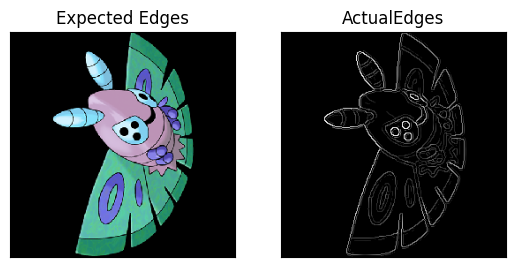

In [ ]:
i = 1922
import cv2 as cv
os.chdir ("/content/drive/My Drive/6.8301_project/Project_Dataset/Target")


img_target= f'{i}.png'
img_source = f'{i}.png'
edges = get_dilated_edges(img_target)
plt.show()
plt.subplot(121)
plt.imshow(cv.imread(img_source), cmap = 'gray')
plt.title('Expected Edges'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(edges, cmap = 'gray')
plt.title('ActualEdges'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
os.chdir("/content/drive/My Drive/6.8301_project/Project_Dataset/")
counter = 0
percentage = 5
iter = 1
target = percentage/100*count

not_in_list = [4128,5315,8863,8960,9846,10380,15761,18004,20697,20965,24161,24400,25057,25731]

not_in = set(not_in_list)
#changed to add elements not carried over from target
for i in to_add: # TODO:  change start + 1 to end
  if i not in not_in:
    try:
      photo_type = 'png'
      img_target_path= f'/content/drive/My Drive/6.8301_project/Project_Dataset/Target/{i}.{photo_type}'
      counter += 1
      img = cv.imread(img_target_path)
      edges = get_dilated_edges(img_target_path)

      img_output_path = f'/content/drive/My Drive/6.8301_project/Project_Dataset/Source/{i}.{photo_type}'
      cv.imwrite(img_output_path, edges)
      if (counter == target):
        counter = 0
        print(f'>>> {iter*percentage}% done!')
        iter += 1
      if (i%100 == 0):
        print(i)
    except:
      print(i, "no")



NameError: ignored

#Test and Train Generation

In [ ]:
not_in = [4128,5315,8863,8960,9846,10380,15761,18004,20697,20965,24161,24400,25057,25731]


In [ ]:
import random
random.seed(42)

full_list = []
for entry in range(1,26209):
  if entry not in not_in:
    full_list.append(entry)
random.shuffle(full_list)
train_list = full_list[0:12000]
print(train_list)

test_list = full_list[12000:15000]
print(test_list)

[3987, 145, 1799, 25751, 15164, 10707, 22474, 13444, 16444, 21103, 5635, 13117, 25703, 6978, 5101, 5672, 15060, 9335, 11075, 7123, 5579, 14249, 14170, 11989, 10791, 3773, 13105, 14152, 18650, 12240, 12767, 25881, 7636, 6205, 5896, 247, 20596, 16904, 25919, 30, 16217, 6346, 22046, 8271, 2561, 80, 14977, 10356, 17252, 10339, 6644, 23247, 20616, 3612, 11623, 24814, 15664, 21319, 13704, 24055, 6123, 1148, 6637, 9038, 9069, 13555, 25100, 25684, 8409, 10401, 10435, 21529, 11200, 14335, 25982, 21047, 4980, 22794, 24788, 19826, 19149, 11806, 11354, 17074, 13609, 13679, 23385, 22738, 9806, 2490, 21514, 19334, 7198, 20049, 20805, 4825, 3940, 3814, 15387, 19657, 15419, 440, 66, 24029, 9610, 752, 19548, 4518, 3596, 13996, 5542, 20850, 488, 4101, 3838, 25915, 18380, 6856, 2261, 8065, 383, 19689, 6380, 9626, 858, 1447, 2232, 20493, 14702, 23867, 7648, 3893, 23826, 21056, 111, 15646, 6426, 17491, 8913, 19961, 8068, 26117, 3724, 11500, 21940, 4392, 25042, 17097, 24041, 26105, 16356, 10592, 23792, 1065

#BLIP

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.5 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
import json

In [ ]:
captioner = pipeline("image-to-text",model="Salesforce/blip-image-captioning-large", device=0)

In [ ]:
#Code for putting test files into test

os.chdir("/content/drive/My Drive/6.8301_project/Project_Dataset")
for number in test_list:
  os.chdir("/content/drive/My Drive/6.8301_project/Project_Dataset/Target")
  im_target = Image.open(f'{number}.png', 'r')
  os.chdir("/content/drive/My Drive/6.8301_project/Project_Dataset/Source")
  im_source = Image.open(f'{number}.png', 'r')
  os.chdir("/content/drive/My Drive/6.8301_project/Project_Dataset/Test_Dataset/target")
  im_target.save(f'{number}.png', format='png')
  os.chdir("/content/drive/My Drive/6.8301_project/Project_Dataset/Test_Dataset/source")
  im_source.save(f'{number}.png', format='png')
  print(number)


18912
5905
16269
20062
22845
24382
23067
18639
19478
18696
6818
11164
6087
12407
5340
3344
16602
25681
16098
14206
16685
8308
1270
14737
17018
17618
17795
22765
11775
8857
25883
17553
16684
18103
14997
11714
20976
21973
13336
9072
16616
5201
9505
7217
26082
14271
3019
631
22925
23552
3813
16995
10754
13172
20033
19561
10333
3727
2085
20806
19875
20463
14050
23282
25950
1050
16421
13660
17031
4531
1304
19706
960
6697
3570
9124
21955
14718
17558
13206
7645
18287
20929
283
7584
19995
2930
20477
5261
10833
9318
5030
2037
15830
9967
10706
4105
10807
14402
19001
22363
19277
633
15900
9361
5533
4848
8897
19502
1402
4497
11190
4600
249
2161
24431
24036
6250
2664
17081
15207
20432
22732
21721
14191
7597
8764
22326
15614
19680
6361
19166
15726
936
17222
11954
12397
23225
10189
11898
16813
24984
3548
17397
22905
5511
13913
426
5701
8876
23476
5001
14631
857
14172
7065
10819
3022
17673
24659
21884
728
22217
17809
6271
309
18768
15237
9996
26201
979
20306
4923
6297
9642
4556
4430
24849
12814
13217


In [ ]:
#Code for putting train files into train

count=0
os.chdir("/content/drive/My Drive/6.8301_project/Project_Dataset")
for number in train_list:
  os.chdir("/content/drive/My Drive/6.8301_project/Project_Dataset/Target")
  im_target = Image.open(f'{number}.png', 'r')
  os.chdir("/content/drive/My Drive/6.8301_project/Project_Dataset/Source")
  im_source = Image.open(f'{number}.png', 'r')
  os.chdir("/content/drive/My Drive/6.8301_project/Project_Dataset/Train_Dataset/target")
  im_target.save(f'{number}.png', format='png')
  os.chdir("/content/drive/My Drive/6.8301_project/Project_Dataset/Train_Dataset/source")
  im_source.save(f'{number}.png', format='png')
  print(number, "number")
  count+=1
  print(count, "count")

Streaming output truncated to the last 5000 lines.
10635 number
9501 count
21186 number
9502 count
20712 number
9503 count
22168 number
9504 count
12790 number
9505 count
9413 number
9506 count
4411 number
9507 count
26188 number
9508 count
3670 number
9509 count
9082 number
9510 count
21966 number
9511 count
3733 number
9512 count
24602 number
9513 count
5138 number
9514 count
8774 number
9515 count
19377 number
9516 count
14046 number
9517 count
1584 number
9518 count
10874 number
9519 count
18210 number
9520 count
19639 number
9521 count
4046 number
9522 count
5272 number
9523 count
23893 number
9524 count
14095 number
9525 count
16622 number
9526 count
8856 number
9527 count
13766 number
9528 count
25286 number
9529 count
19924 number
9530 count
6068 number
9531 count
24062 number
9532 count
19115 number
9533 count
5966 number
9534 count
23699 number
9535 count
24085 number
9536 count
9433 number
9537 count
22772 number
9538 count
25812 number
9539 count
21331 number
9540 count
221

In [ ]:
#Code for Test Generation

numberImagesSeen = 0
percentage = 5
iter = 1
target = percentage/100*count

with open('/content/drive/My Drive/6.8301_project/Project_Dataset/Test_Dataset/prompt.json', 'w') as f:
#changed start to 21- change each time we stop training
  for i in test_list:
    numberImagesSeen += 1
    label = 'png'
    img_target_path = f'/content/drive/My Drive/6.8301_project/Project_Dataset/Test_Dataset/Target/{i}.{label}'
    img = Image.open(img_target_path)
    w, h = img.size
    img = img.resize((int(w/2), int(h/2))).convert('RGB')
    # inputs = processor(img, return_tensors="pt")

    # out = model.generate(**inputs)
    # prompt = processor.decode(out[0], skip_special_tokens=True)

    caption = captioner(img)[0]['generated_text'].split()
    if 'araf' in caption[0]:
      caption = caption[1:]
    caption = ' '.join(caption)
    print(f"{i}.{label} caption: {caption}")
    json.dump({
        'source': f'source/{i}.{label}',
        'target': f'target/{i}.{label}',
        'prompt': caption
    }, f, indent=0)
    if (numberImagesSeen == target):
      numberImagesSeen = 0
      print(f'{iter*percentage}% done!')
      iter += 1
      # print(f"{i}.{label} caption: {caption}")



In [ ]:
numberImagesSeen = 0
percentage = 5
iter = 1

not_in_list = [4128,5315,8863,8960,9846,10380,15761,18004,20697,20965,24161,24400,25057,25731]

not_in = set(not_in_list)

target = percentage/100*count
with open('/content/drive/My Drive/6.8301_project/Project_Dataset/prompt.json', 'a') as f:
#changed start to 21- change each time we stop training
  for i in range(1188, count+1):
    if i in not_in:
      continue
    numberImagesSeen += 1
    label = 'png'
    img_target_path = f'/content/drive/My Drive/6.8301_project/Project_Dataset/Target/{i}.{label}'
    img = Image.open(img_target_path)
    w, h = img.size
    img = img.resize((int(w/2), int(h/2))).convert('RGB')
    # inputs = processor(img, return_tensors="pt")

    # out = model.generate(**inputs)
    # prompt = processor.decode(out[0], skip_special_tokens=True)

    caption = captioner(img)[0]['generated_text'].split()
    if 'araf' in caption[0]:
      caption = caption[1:]
    caption = ' '.join(caption)
    print(f"{i}.{label} caption: {caption}")
    json.dump({
        'source': f'source/{i}.{label}',
        'target': f'target/{i}.{label}',
        'prompt': caption
    }, f, indent=0)
    if (numberImagesSeen == target):
      numberImagesSeen = 0
      print(f'{iter*percentage}% done!')
      iter += 1
      # print(f"{i}.{label} caption: {caption}")




Streaming output truncated to the last 5000 lines.
2737.png caption: a cartoon blue dog with a green nose and a blue body
2738.png caption: cartoon of a blue dog with a red nose and a blue nose
2739.png caption: cartoon of a blue dog with a green eye laying down
2740.png caption: cartoon of a blue dog with a tennis ball in its mouth
2741.png caption: a green cartoon character with a big smile on his face
2742.png caption: a green cartoon frog with a green nose and green eyes
2743.png caption: a green teddy bear with a green hat and a green nose
2744.png caption: a green frog with a tennis ball in its mouth
2745.png caption: a purple cartoon character with a green face and arms
2746.png caption: purple and green cartoon character with a big eye
2747.png caption: purple dog with green eyes and tail
2748.png caption: purple cat with green eyes laying down on the ground
2749.png caption: a cartoon beaver with a mask on sitting on its back
2750.png caption: cartoon of a brown dog with a gre

KeyboardInterrupt: ignored